# Example 10.4: Rankine with Reheat

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A Rankine cycle operates with water as the working fluid with a turbine inlet condition of 3 MPa and $550^\circ\mathrm{C}$.  After expansion to 400 kPa, the steam is reheated to $550^\circ\mathrm{C}$ and then expanded to 15 kPa.  For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$ find:
* (a) Specific net work (kJ/kg)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle

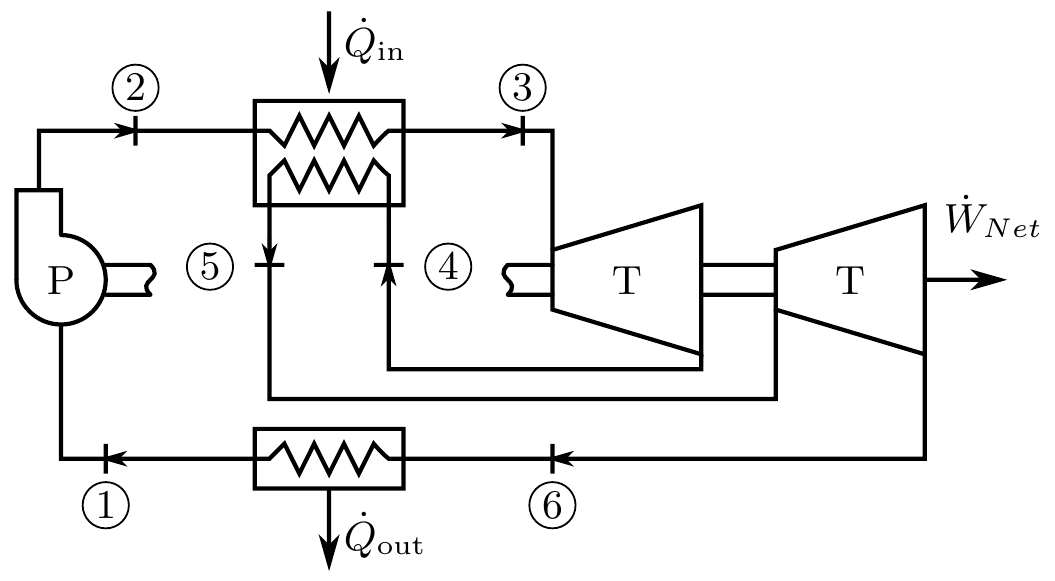

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
   
water = realfluid.Properties('Water')

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


### Given Parameters
We now define variables to hold our known values.

In [2]:
T[3] = Quantity(550.0,'degC') # Turbine inlet temperature
p[3] = Quantity(3.0,'MPa')    # Turbine inlet pressure
p[4] = Quantity(400.0,'kPa')  # Pressure after first expansion
T[5] = Quantity(550.0,'degC') # Reheat temperature
p[6] = Quantity(15.0,'kPa')   # Pressure after second expansion
eta_t = 0.8                 # Turbine isentropic efficiency
eta_p = 0.6                 # Pump isentropic efficiency

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p
unit,°C,kPa
3,550,3000
4,-,400
5,550,-
6,-,15


### Assumptions
- Non-ideal work devices
- Superheat in boiler: superheated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[1] = 0      # Single phase into pump
p[2] = p[3]   # isobaric heat exchanger
p[5] = p[4]   # isobaric heat exchanger
p[1] = p[6]   # isobaric heat exchanger

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,x
unit,°C,kPa,
1,-,15.0,0
2,-,3000.0,-
3,550,3000.0,-
4,-,400.0,-
5,550,400.0,-
6,-,15.0,-


#### (a) Mass flow rate

In [6]:
#### State 1)
T[1] = water.T(p[1],x[1])
v[1] = water.v(p[1],x[1])
h[1] = water.h(p[1],x[1])
s[1] = water.s(p[1],x[1])

#### 1-2) Non-ideal compression
# Isentropic compression
p['2s'] = p[2]
s['2s'] = s[1]
T['2s'] = water.T(p['2s'],s['2s'])
h['2s'] = water.h(p['2s'],s['2s'])
v['2s'] = water.v(p['2s'],s['2s'])
# Actual compression
h[2] = h[1] + (h['2s']-h[1])/eta_p
T[2] = water.T(p[2],h=h[2])
v[2] = water.v(p[2],h=h[2])
s[2] = water.s(p[2],h=h[2])
w_1_to_2 = h[1]-h[2]

#### 2-3) Isobaric heat addition
v[3] = water.v(T[3],p[3])
h[3] = water.h(T[3],p[3])
s[3] = water.s(T[3],p[3])

#### 3-4) Non-ideal expansion
# Isentropic Expansion
p['4s'] = p[4]
s['4s'] = s[3]
T['4s']= water.T(p['4s'],s['4s'])
v['4s']= water.v(p['4s'],s['4s'])
h['4s'] = water.h(p['4s'],s['4s'])

# Actual expansion
h[4] = h[3] - eta_t*(h[3]-h['4s'])
T[4] = water.T(p[4],h=h[4])
v[4] = water.v(p[4],h=h[4])
s[4] = water.s(p[4],h=h[4])
w_3_to_4 = h[3]-h[4]

#### 4-5) Isobaric heat addition
v[5] = water.v(T[5],p[5])
h[5] = water.h(T[5],p[5])
s[5] = water.s(T[5],p[5])

#### 5-6) Non-ideal expansion
# Isentropic Expansion
p['6s'] = p[6]
s['6s'] = s[5]
T['6s']= water.T(p['6s'],s['6s'])
v['6s']= water.v(p['6s'],s['6s'])
h['6s'] = water.h(p['6s'],s['6s'])

# Actual expansion
h[6] = h[5] - eta_t*(h[5]-h['6s'])
T[6] = water.T(p[6],h=h[6])
v[6] = water.v(p[6],h=h[6])
s[6] = water.s(p[6],h=h[6])
w_5_to_6 = h[5]-h[6]

#### Mass flow rate
w_net = w_1_to_2 + w_3_to_4 + w_5_to_6


display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,v,h,s,x
unit,°C,kPa,m³/kg,kJ/kg,kJ/K/kg,
1,53.969313,15.0,0.001014,225.944282,0.754865,0
2,54.566922,3000.0,0.001013,230.985965,0.761023,-
2s,54.084027,3000.0,0.001013,228.969291,0.754865,-
3,550.000000,3000.0,0.124368,3569.702948,7.376848,-
4,308.262535,400.0,0.664687,3084.046040,7.597079,-
4s,249.104089,400.0,0.594118,2962.631813,7.376848,-
5,550.000000,400.0,0.947510,3593.587361,8.328669,-
6,204.912614,15.0,14.698171,2888.933076,8.737496,-
6s,113.547646,15.0,11.875855,2712.769504,8.328669,-


#### (b) Thermal efficiency

In [7]:
#### Boiler First Law
q_in = h[3]-h[2] + h[5]-h[4]

#### Thermal efficiency
eta_th = w_net/q_in
eta_th = eta_th.to('') # hide

display.Calculations(locals());

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (d) Diagrams

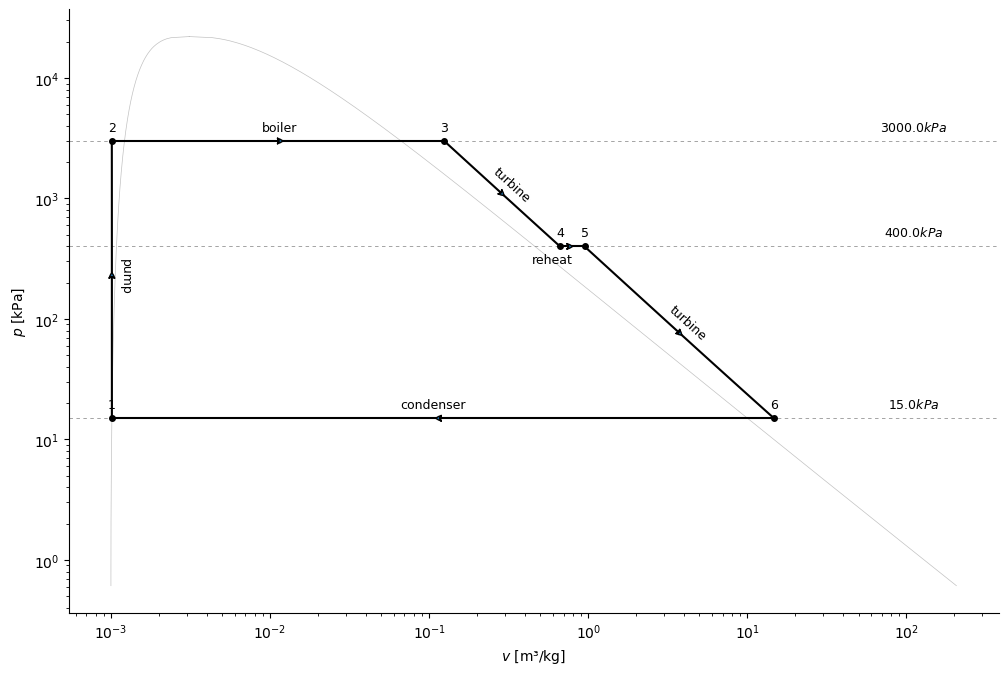

In [8]:
pv = water.pv_diagram()
pv.plot_isobar(p[3])
pv.plot_isobar(p[4])
pv.plot_isobar(p[6])

for state in [1,2,3,4,5,6]:
    pv.plot_state(states[state])
    
pv.plot_process(states[1],states[2],path='nonideal',label='pump')
pv.plot_process(states[2],states[3],path='isobaric',label='boiler')
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[5],path='isobaric',label='reheat',labelprops=dict(ha='right',va='top'))
pv.plot_process(states[5],states[6],path='nonideal',label='turbine')
pv.plot_process(states[6],states[1],path='isobaric',label='condenser');

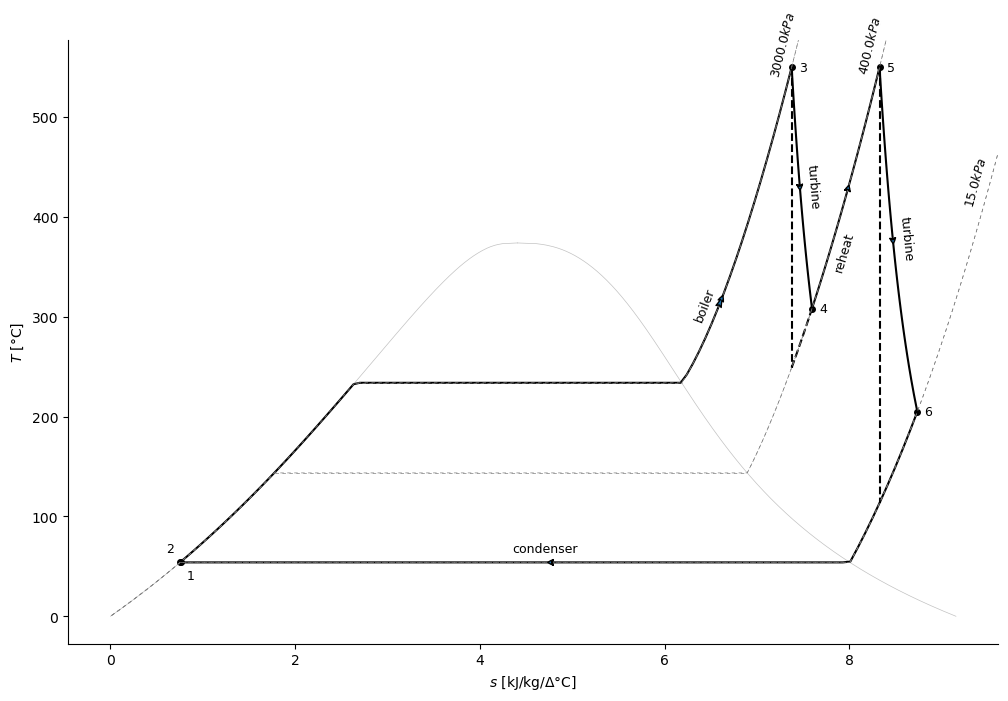

In [9]:
Ts = water.Ts_diagram()

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='east')
Ts.plot_state(states[4],label_loc='east')
Ts.plot_state(states[5],label_loc='east')
Ts.plot_state(states[6],label_loc='east')
    
Ts.plot_process(states[1],states[2],path='nonideal',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='boiler')
Ts.plot_process(states[3],states[4],path='nonideal',label='turbine')
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[4],states[5],path='isobaric',label='reheat',labelprops=dict(va='top',pos=.25))
Ts.plot_process(states[5],states[6],path='nonideal',label='turbine')
Ts.plot_process(states[5],states['6s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states['4s'],states[4],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[1],path='isobaric',label='condenser');

Ts.plot_isobar(p[3],pos=.99)
Ts.plot_isobar(p[4],pos=.99)
Ts.plot_isobar(p[6],pos=.99);